In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [56]:
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as mb

In [3]:
#opsdb = db.OpsimDatabaseV4('/Users/lynnej/opsim/db/colossus_2177.db')
#runName = 'colossus_2177.db'
opsdb = db.OpsimDatabaseV3('/Users/lynnej/opsim/db/minion_1016_sqlite.db')
runName = 'minion_1016'

In [4]:
# What were those available columns again?
#opsdb.columnNames['SummaryAllProps']
opsdb.columnNames['Summary']

['obsHistID',
 'sessionID',
 'propID',
 'fieldID',
 'fieldRA',
 'fieldDec',
 'filter',
 'expDate',
 'expMJD',
 'night',
 'visitTime',
 'visitExpTime',
 'finRank',
 'FWHMeff',
 'FWHMgeom',
 'transparency',
 'airmass',
 'vSkyBright',
 'filtSkyBrightness',
 'rotSkyPos',
 'rotTelPos',
 'lst',
 'altitude',
 'azimuth',
 'dist2Moon',
 'solarElong',
 'moonRA',
 'moonDec',
 'moonAlt',
 'moonAZ',
 'moonPhase',
 'sunAlt',
 'sunAz',
 'phaseAngle',
 'rScatter',
 'mieScatter',
 'moonIllum',
 'moonBright',
 'darkBright',
 'rawSeeing',
 'wind',
 'humidity',
 'slewDist',
 'slewTime',
 'fiveSigmaDepth',
 'ditheredRA',
 'ditheredDec',
 'sims_skybrightness',
 'sims_m5']

In [6]:
# Only doing this here to test metric ahead of time. Would be done automatically in metricBundleGroup.
#colnames = ['night', 'fieldRA', 'fieldDec', 'observationStartMJD', 'filter', 'seeingFwhmGeom', 'fiveSigmaDepth']
colnames = ['night', 'fieldRA', 'fieldDec', 'expMJD', 'filter', 'FWHMgeom', 'fiveSigmaDepth']
sqlconstraint = 'night < 365*3'
simdata = opsdb.fetchMetricData(colnames=colnames, sqlconstraint=sqlconstraint)

In [7]:
#s = slicers.HealpixSlicer(nside=64, latLonDeg=True)
s = slicers.HealpixSlicer(nside=64, latLonDeg=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [8]:
s.setupSlicer(simdata)

In [9]:
# Example: Here are the observations for a single slicepoint (single point in the healpix slicer)
#  I'll use this for testing the new metric below.
import pandas as pd
i = 46437
p = pd.DataFrame(simdata[s[i]['idxs']])
print("At RA/dec", np.degrees(s[i]['slicePoint']['ra']), np.degrees(s[i]['slicePoint']['dec']))
p

At RA/dec 237.162162162 -62.6966600203


,night,fieldRA,fieldDec,expMJD,filter,FWHMgeom,fiveSigmaDepth
0,33,4.075033,-1.096113,59613.247704,u,1.796682,21.915653
1,56,4.075033,-1.096113,59636.158029,z,1.213176,22.251852
2,33,4.075033,-1.096113,59613.248591,u,1.903841,21.856087
3,50,4.075033,-1.096113,59630.213875,y,0.805106,21.445972
4,36,4.075033,-1.096113,59616.275045,i,1.541960,22.661559
5,28,4.075033,-1.096113,59608.232933,z,1.113299,22.345548
6,120,4.075033,-1.096113,59700.099161,u,0.816352,23.164160
7,170,4.075033,-1.096113,59750.270077,r,0.727932,23.928938
8,119,4.075033,-1.096113,59698.989116,i,1.015677,22.990836
9,204,4.075033,-1.096113,59784.254860,r,1.376172,23.291053


In [10]:
from lsst.sims.maf.metrics import BaseMetric

# remove metric from registry list if it's there already (rerunning this cell)
try:
    m = BaseMetric
    del(m.registry['__main__.DistantPlanetMetric'])
except KeyError:
    pass

class DistantPlanetMetric(BaseMetric):
    def __init__(self, magBins=np.arange(21, 25, .5), metricName='DistantPlanet',
                 magColName='fiveSigmaDepth', timeColName='observationStartMJD', 
                 magSlice=24.5, muSlice=.04, badval=1000, **kwargs):
        self.magBins = magBins
        self.magCol = magColName
        self.timeCol = timeColName
        self.magSlice = magSlice
        self.idx = np.argsort(np.abs(self.magBins - magSlice))[0]
        self.muSlice = muSlice
        super(DistantPlanetMetric, self).__init__(col=[self.magCol, self.timeCol], metricName=metricName,
                                                  badval=badval, **kwargs)
    def run(self, dataSlice, slicePoint=None):
        # Return mu = np array of mu values at each mag point. Mu in "/year.
        mu = np.zeros(len(self.magBins), float)
        for i, magBin in enumerate(self.magBins):
            vis = np.where(dataSlice[self.magCol] > magBin)[0]
            if len(vis) == 0:
                mu[i] = self.badval
            else:
                # Look for maximum timespan available with this magnitude limit.
                dt = dataSlice[self.timeCol][vis].max() - dataSlice[self.timeCol][vis].min()
                dt = dt / 365.25
                # Assume we can detect anything that moves more than 300mas 
                mu[i] = 0.3 / dt
        return mu
    def reduceMu(self, metricval):
        return metricval[self.idx]
    def reduceMag(self, metricval):
        idx = np.where(metricval < self.muSlice)[0]
        if len(idx) == 0:
            val = self.badval
        if len(idx) > 0:
            idx = idx.max()
            val = self.magBins[idx]
        return val

In [45]:
# Test the new metric.
#m = DistantPlanetMetric(magBins=np.arange(21, 25, .5), timeColName='observationStartMJD')
m = DistantPlanetMetric(magBins=np.arange(21, 25, .5), timeColName='expMJD', magSlice=22)
mval = m.run(simdata[s[i]['idxs']])
print(m.magBins)
print(mval)
print('Value at ', m.magSlice, m.reduceMu(mval))
print('Value at ', m.muSlice, m.reduceMag(mval))

[ 21.   21.5  22.   22.5  23.   23.5  24.   24.5]
[ 0.11322321  0.11322404  0.11574108  0.11574108  0.11622042  0.11622925
  0.12383695  0.14119562]
Value at  22 0.115741075227
Value at  0.04 1000


In [46]:
# Set up metricBundle, so we can pass it into metricBundleGroup, run it, and save all the results.
planetBundle = mb.MetricBundle(m, s, sqlconstraint, runName=runName)

In [47]:
mmb = mb.MetricBundleGroup({'planet': planetBundle}, opsdb)
mmb.setCurrent(sqlconstraint)
mmb.runCurrent(sqlconstraint, simData=simdata)

Running:  ['planet']


/Users/lynnej/lsstsw/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [15]:
# Where did the new 'reduce' values go? Into new metricBundles.
mmb.bundleDict

{'DistantPlanet_Mag': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x149005320>,
 'DistantPlanet_Mu': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x1490056a0>,
 'planet': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x15bdde710>}

In [16]:
mu = mmb.bundleDict['DistantPlanet_Mu']

CE


{'SkyMap': 1}

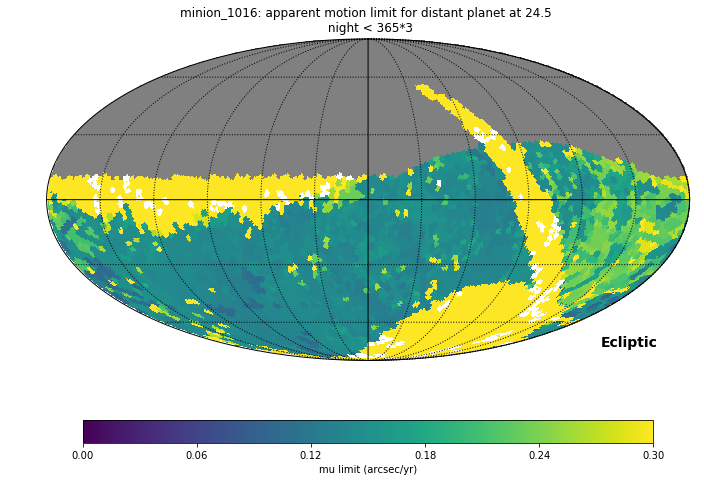

In [30]:
%matplotlib inline

mu.plotDict = {}
title = '%s: apparent motion limit for distant planet at %.1f' % (runName, m.magSlice)
title += ' \n %s' % (sqlconstraint)
plotDict = {'xlabel':"mu limit (arcsec/yr)", 'title': title,
            'colorMin':0, 'colorMax':0.3, 'nTicks': 5, 'cmap':'viridis', 'coord':'CE', 'figsize':(11, 8)}
mu.setPlotDict(plotDict)
mu.plot(plotFunc=plots.HealpixSkyMap())

C


{'SkyMap': 1}

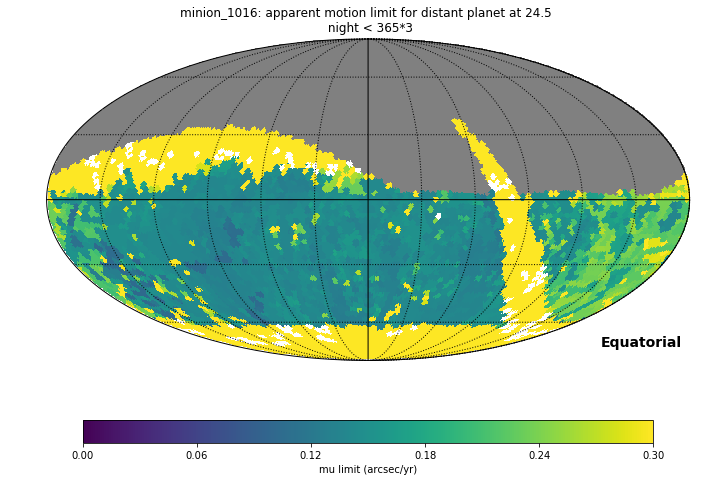

In [31]:
mu.setPlotDict({'coord': 'C'})
mu.plot(plotFunc=plots.HealpixSkyMap())

In [33]:
# Check against the proper motion metric
m2 = metrics.ProperMotionMetric(mjdCol='expMJD', seeingCol='FWHMgeom', rmag=24.5, normalize=False, baseline=3)
propermotion = mb.MetricBundle(m2, s, sqlconstraint, runName=runName)

In [34]:
mmb = mb.MetricBundleGroup({'propermotion': propermotion}, opsdb)
mmb.setCurrent(sqlconstraint)
mmb.runCurrent(sqlconstraint, simData=simdata)

Running:  ['propermotion']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


CE


{'SkyMap': 1}

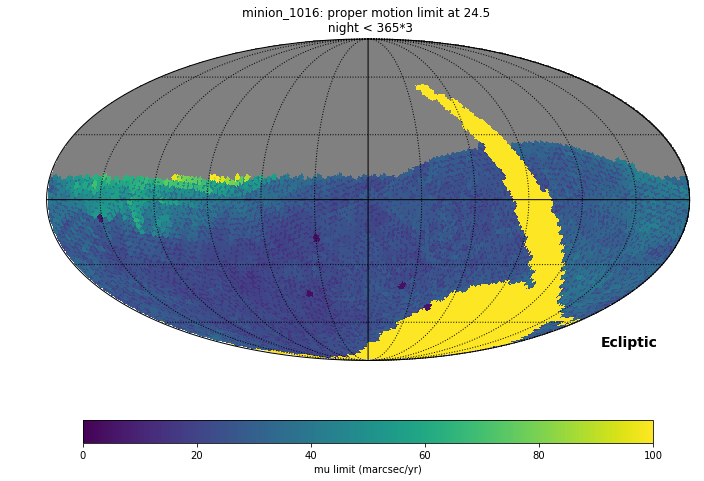

In [44]:
propermotion.plotDict = {}
title = '%s: proper motion limit at %.1f' % (runName, m2.mags['r'])
title += ' \n %s' % (sqlconstraint)
plotDict = {'xlabel':"mu limit (marcsec/yr)", 'title': title,
            'colorMin':0, 'colorMax':100, 'nTicks': 5, 'cmap':'viridis', 'coord':'CE', 'figsize':(11, 8)}
propermotion.setPlotDict(plotDict)
propermotion.plot(plotFunc=plots.HealpixSkyMap())

In [59]:
# Check against the parallax  metric
m3 = metrics.ParallaxMetric(seeingCol='FWHMgeom', rmag=24.5, normalize=False)
parallaxStacker = stackers.ParallaxFactorStacker(dateCol='expMJD', raDecDeg=False)
parallax = mb.MetricBundle(m3, s, sqlconstraint, stackerList=[parallaxStacker], runName=runName)

In [60]:
mmb = mb.MetricBundleGroup({'parallax': parallax}, opsdb)
mmb.setCurrent(sqlconstraint)
mmb.runCurrent(sqlconstraint, simData=simdata)

Running:  ['parallax']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/lynnej/lsstRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: MetricBundle (minion_1016_parallax_night_lt_365*3_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


{'SkyMap': None}

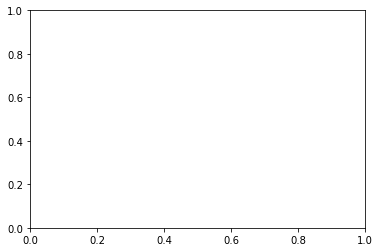

In [52]:
parallax.plot(plotFunc=plots.HealpixSkyMap())